<a href="https://colab.research.google.com/github/NadunPrabhasha/SE4050-Deep-Learning-Final-Assignment/blob/main/EfficientNetB0_BananaLeaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving banana_leaf_disease.zip to banana_leaf_disease.zip


In [ ]:
import zipfile, os

zip_path = "banana_leaf_disease.zip"     # use the exact filename you uploaded
extract_dir = "banana_leaf_disease"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)


['banana_leaf_disease']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "banana_leaf_disease",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "banana_leaf_disease",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 1616 files belonging to 1 classes.
Using 1293 files for training.
Found 1616 files belonging to 1 classes.
Using 323 files for validation.
Classes: ['banana_leaf_disease']


In [ ]:
import os

for root, dirs, files in os.walk("banana_leaf_disease"):
    print(root)
    break


banana_leaf_disease


In [ ]:
import shutil, os

src = "banana_leaf_disease/banana_leaf_disease"
dst = "banana_leaf_disease"

for folder in os.listdir(src):
    shutil.move(os.path.join(src, folder), dst)
shutil.rmtree(src)


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "banana_leaf_disease",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "banana_leaf_disease",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

print("Classes:", train_ds.class_names)


Found 1616 files belonging to 4 classes.
Using 1293 files for training.
Found 1616 files belonging to 4 classes.
Using 323 files for validation.
Classes: ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']


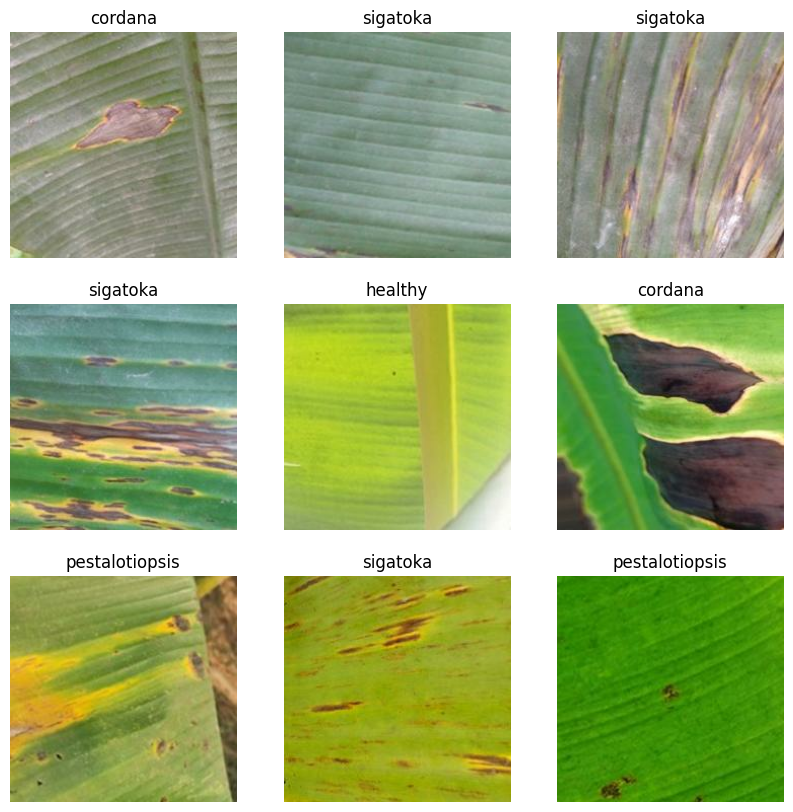

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze base layers (transfer learning)

model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.7020 - loss: 0.7351 - val_accuracy: 0.9474 - val_loss: 0.1508
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9731 - loss: 0.1040 - val_accuracy: 0.9721 - val_loss: 0.0774
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9839 - loss: 0.0684 - val_accuracy: 0.9876 - val_loss: 0.0517
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9831 - loss: 0.0566 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9825 - loss: 0.0540 - val_accuracy: 0.9845 - val_loss: 0.0363
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9881 - loss: 0.0418 - val_accuracy: 0.9876 - val_loss: 0.0475
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9936 - loss: 0.0261 - val_accuracy: 0.9845 - val_loss: 0.0484
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9928 - loss: 0.0265 - val_accuracy: 0.9907 

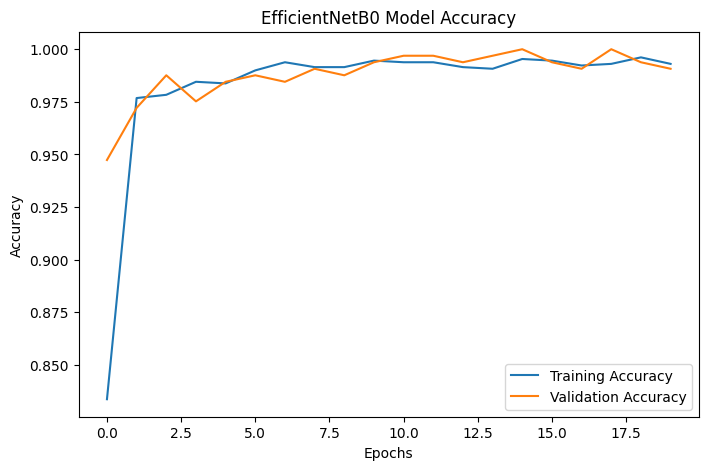

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


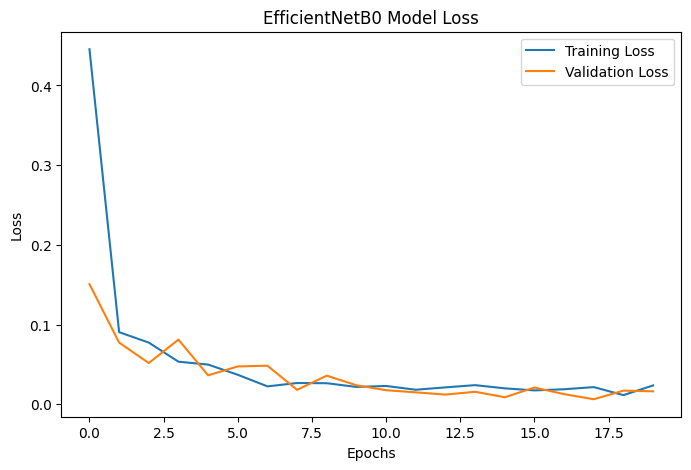

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('EfficientNetB0 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("efficientnet_banana.h5")


In [ ]:
from google.colab import files
files.download("efficientnet_banana.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving banana-leaf-spot-disease-caused-260nw-2576023991.webp to banana-leaf-spot-disease-caused-260nw-2576023991.webp


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_index = np.argmax(pred)

print("Predicted index:", predicted_index)
print("Class names:", class_names)

if 0 <= predicted_index < len(class_names):
    pred_class = class_names[predicted_index]
    print("Predicted Class:", pred_class)
else:
    print("Error: Predicted index is out of range.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted index: 2
Class names: ['banana_leaf_disease']
Error: Predicted index is out of range.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving leaf-blotch-of-banana-banana-1563887348.jpg to leaf-blotch-of-banana-banana-1563887348.jpg


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]
print("Predicted Class:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: banana_leaf_disease
